In [1]:
# 1. ders
# Önceki dersin özeti
# Accuracy: Balanced datasetlerinde kullanıyor. Unbalanced da hangi sınıf çoğunluktayda onu daha çok yakalıyor
# Recall, Precision, F1: Unbalanced verisetlerinde bu metriklere bakılır.
# ROC/AUC: Her bir threshold dikkate alınarak çiziyor. Modelimiz sınıflandırmayı ne derece düzgün yapıyor. 
# Bunun hakkında bilgi veriyordu

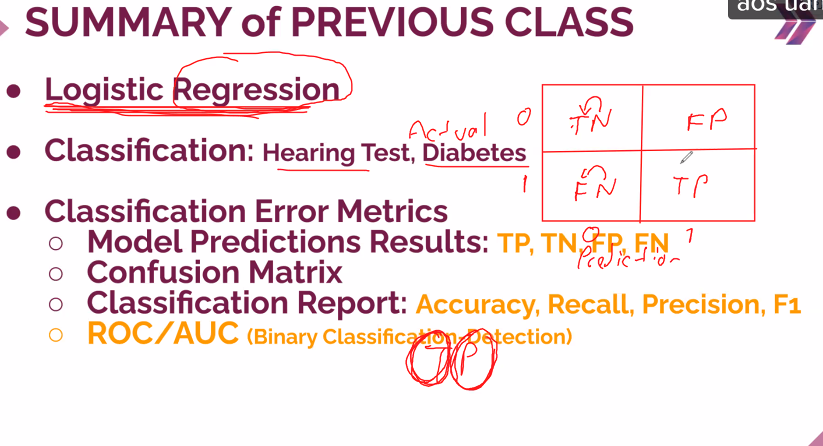

In [2]:
# bugünkü ders
# KNN Theory : bana etrafındaki datalrı söyle, sana hangi sınıfa ait olduğunu söyleyeyim
# Veri etrafındaki noktalara bakarak hangi sınıfa ait olduğunu bulma mantığıyla çalışır.
# Distance-based (mesafe temelli, mesafeye dayalı) bir modeldir. Bundan dolayı scaling yapmak gereklidir.

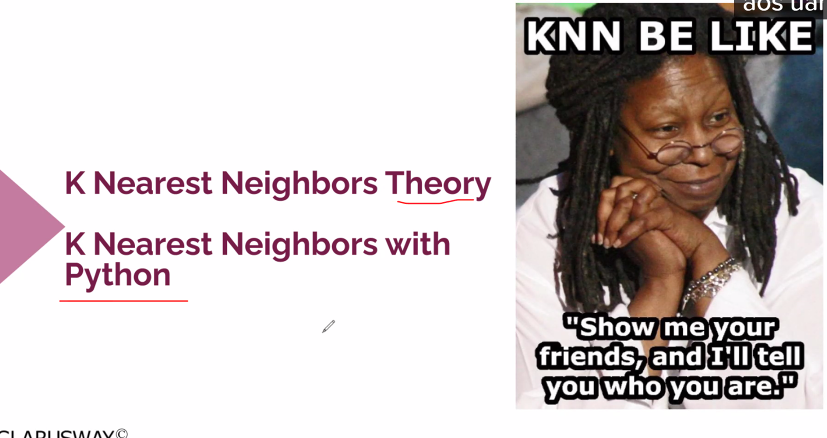

In [3]:
# KNN genel özellikleri
# Classification algoritması. Regression da yapıyor ancak biz classification modelini göreceğiz.
# Regression modeli olduğunu bilin ama çok tercih edilmiyor
# lazy learner (eğitime ihtiyaç duymayan)  bir modeldir. 
# Her bir data noktasını hafızasına alır buna göre "map"leme yapar
# Yeni bir data noktası geldiğinde o data noktasının tüm gözlemlere olan uzaklığını hesaplıyor, sıralama falan yapıyor
# Non-lineer (Bir varsayımı yoktur) ve non-parametric (katsayısı yoktur).
# genelde küçük boyutlu datasetlerinde kullanılır. hesaplama maliyeti büyük datsetlerinde ciddidir.
# arıza tespiti ya da tavsiye sistemlerinde kullanılır

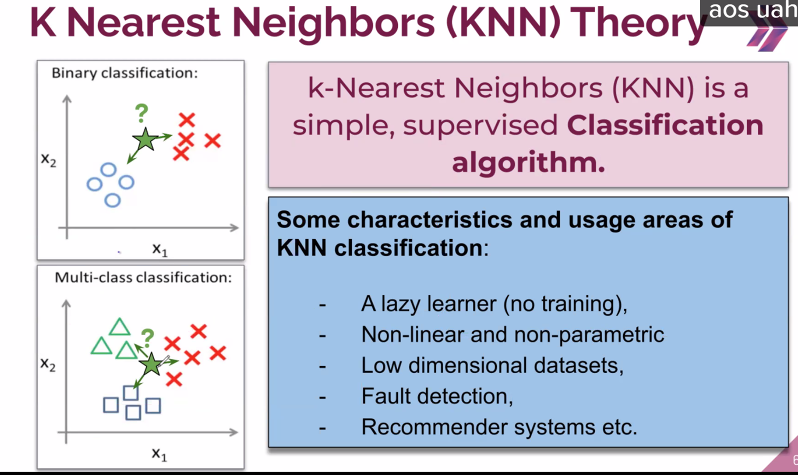

In [4]:
# 1-0 şeklinde sınıflandırmayı nasıl yapıyor?
# Örneğin yıldız gözlemini düşünelim, mavilere mi atacak, turunculara mı atayacak bu noktayı
# k : komşu sayısı
# k seçimi önemli. En yakın kaç komşuya bakacağını biz belirliyoruz k ile.
# k nın seçiminin dışında burada mesafe de önemli.

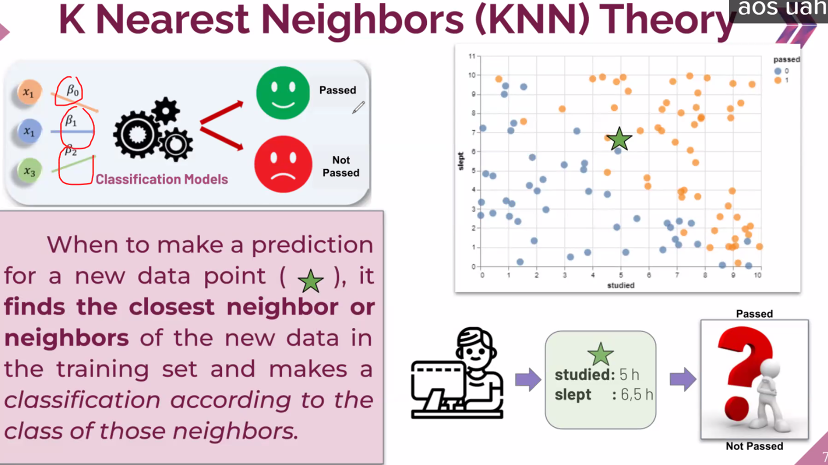

In [5]:
# Alttaki problemi nasıl sınıflandıracağız bakalım bir sonraki slight a

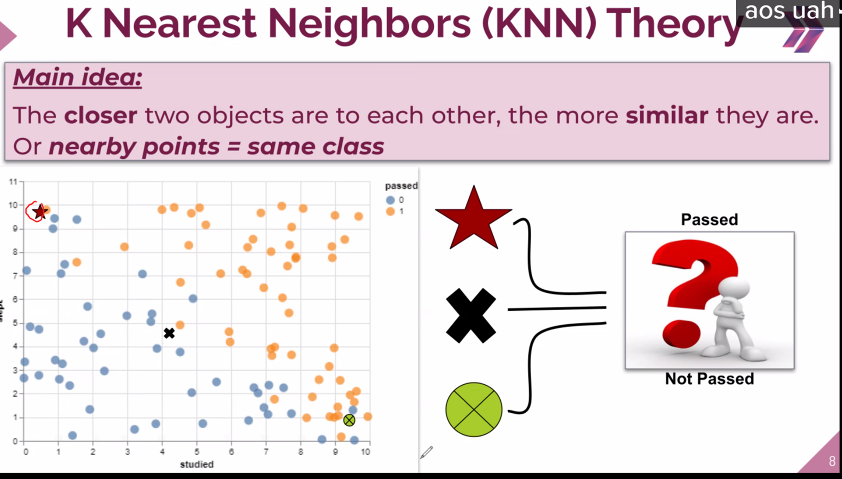

In [6]:
# Yıldız için
    # k=1 ise en yakınındaki değer turuncu renk olduğu için turuncu sınıfına atayacak 
    # k=3 olduğunda en yakındaki 3 komşuda(noktada) ağırlıklı olan sınıf mavi olduğu için maviye atadı
    # k=5 olduğunda en yakındaki 5 komşuda(noktada) ağırlıklı olan sınıf mavi olduğu için maviye atadı
# Çarpı için
    # k=1 ise en yakınındaki değer turuncu renk olduğu için turuncu sınıfına atayacak 
    # k=3 olduğunda en yakındaki 3 komşuda(noktada) ağırlıklı olan sınıf mavi olduğu için maviye atadı
    # k=5 olduğunda en yakındaki 5 komşuda(noktada) ağırlıklı olan sınıf mavi olduğu için maviye atadı
# Yeşil top için
    # Benzer mantıkta
    
# Özetle: k seçimine göre sınıflandırma sonuçlarımız değişebiliyor. k seçimi önemli

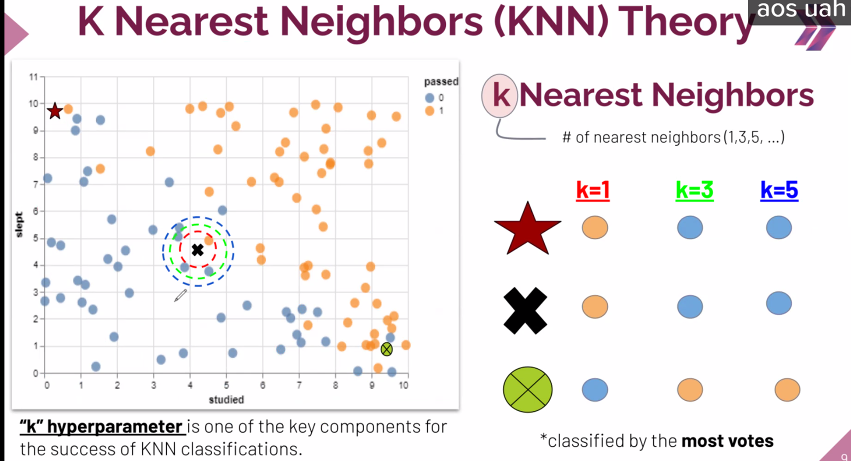

In [7]:
# k seçimi önemli dedik
# k arttıkça trainin ve validation hataları artıyor grafikte gördüğümüz gibi
# k yı küçük değer seçersek overfit oluyor (low bias - high variance)
# k yı büyük değer seçersek underfit (high bias - low variance). hata gittikçe büyüyor. high bias hatanın büyük olması.
# başlangıçta k büyüdükçe, train hatası büyüyor validation hatası düşüyor, sonra bir noktada birbirlerine yaklaşıyorlar. 
# Biz de birbirlerine yakın olmasını istiyoruz zaten (trade-off durumu, low bias, low variance)
# high bias, yani hata büyük olduğunda, underfit oluyor.
# Ares Hoca: Alttaki grafiği aklımızda tutalım bu işin mantığını anlatıyor
# knn küçük datasetlerinde kullanılır. Çünkü büyük k değeri seçtiğimizde büyük hesaplama maliyetlerine katlanmak zorundayız

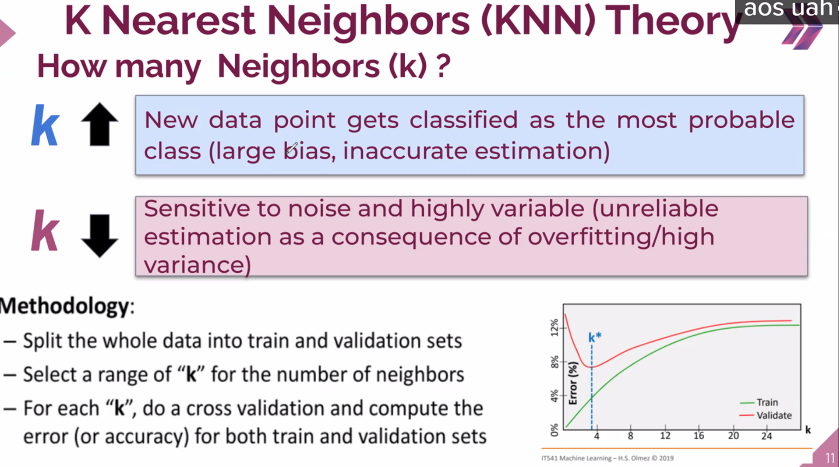

In [8]:
# K seçimi için 2 metod var:
    # 1.elbow metodu
    # 2.grid search
# Error rate e bakacağız. Bu skor accuracy, precision, recall olabilir
# 1-accuracy değerini hesaplayacağız. Bu bizim error rate i olacak. Yani accuracy:0.92 ise hata rate imiz: 0.08 olacak
# Miminum hata oranını bulmamız gerekiyor
# Mesela burada k =35,37,38 de vs hata düşük görünüyor ama k nın büyük olması demek underfit e gitmeye açık olması demek
# Ancak örneğin k=18 e baktığımızda hatadaki değişim çok az oluyor. O yüzden k=18 de hata biraz daha yüksek olmasına rağmen
# .. k=18 i k=36 ya tercih etmek daha mantıklıdır. Çünkü k=36 hesaplama maliyetimiz var, 
# k yı ne kadar büyük seçerseniz hesaplama maliyetine katlanmış olursunuz. k yı mümkün olduğnca küçük seçmeye çalışacaz.
# optimal k yı seçeceğiz. elbow ya da grid search ile.
# Buradaki Bias-variance dengesini sağlamalıyız
# Not olarak k=12 vs de seçilebilirdi. Bu değer de alınabilir. Farklı değerlerde alınabilir. Bunları deneyip karar vereceğiz

# Elbow da   : Kırılım(Dirsek) yerine bakarak yorumlayacağız. Uygulamada göreceğiz
# Grid search: Genelde hatanın minimum olduğu noktayı bulur. Seçimimiz bizim k=18 olacakken, grid search k=34 seçer
# .. kaynaklarda grid search ün bulduğu k değerinin kullanılmaması gerektiğini görürüz. Grafikte detaylı göreceğiz
# Genelde elbow metodu ile karar vereceğiz

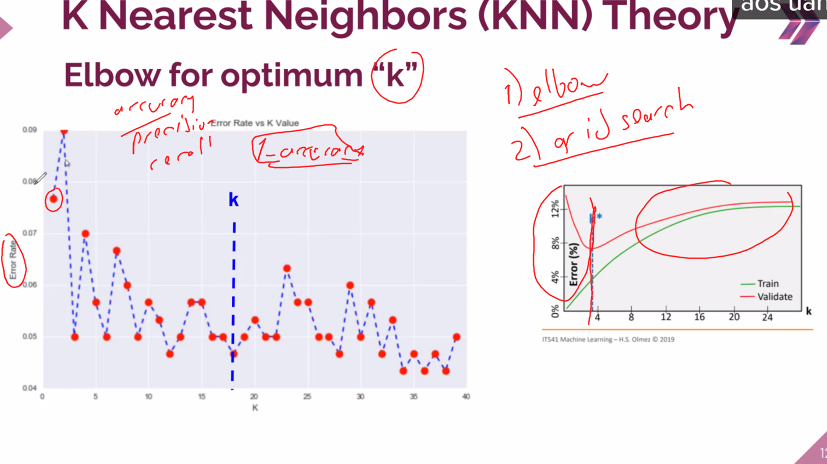

In [9]:
# k haricinde bir diğer(ikinci) hiperparametremiz weight. weight: uniform ve distance
# weight: modelin gözlemleri nasıl ağırlıklandıracağı
    # uniform: Bütün gözlemleri eşit ağırlıklandırır. majority voting. 
        # k =5 olduğunda tüm değerler eşit ağırlıklı olursa hangi sınıf fazla olursa o sınıfa atama yapacak.
    # distance : Mesafeye göre ağırlıklandırıyor. Yakın gözleme daha büyük bir ağırlık veriyor.
        # k=3 olduğunda bir değer yakın olsun noktamıza(0 a ait), iki değer uzak olsun(1 e ait)
        # .. 0 a ait olanın ağırlığı 1.8, 1 lere ait olan 0.7 ve 0.6 olursa bu noktayı 0 sınıfına atayacaktır
    # NOT: Modelden modele hangisinin daha iyi olduğu değişecektir. Datadan dataya değişir.

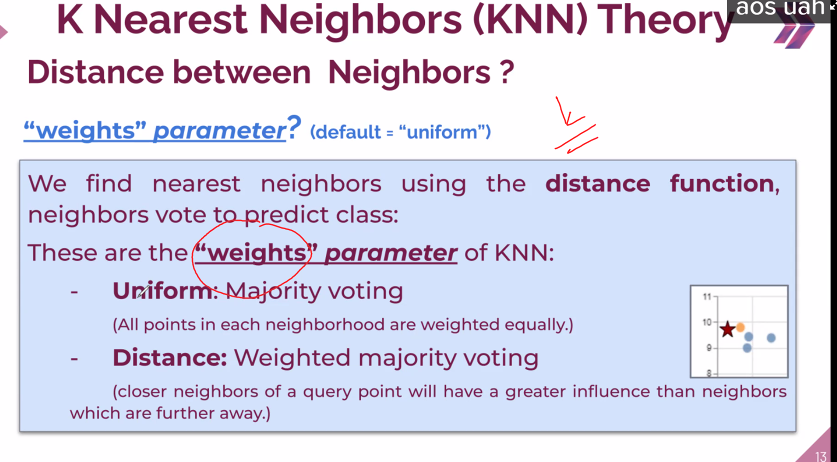

In [10]:
# 3. hyperparametriğimiz de Euclidian ya da manhattan
# Mesafeleri nasıl ölçeceğiz
# Default olarak model Minkowski yi kullanır
# p = 2 seçersek mesafe metriğimiz Euclidian .  Dik üçgendeki(3-4-5 olsun) hipotenüsü hesaplayacak gibi düşünebiliriz (Yani 5)
# p = 1 seçersek mesafe metriğimiz Manhattan olacak . Dik üçgendeki kenarları topluyor gibi düşünebiliriz(Yani 3+4=7)

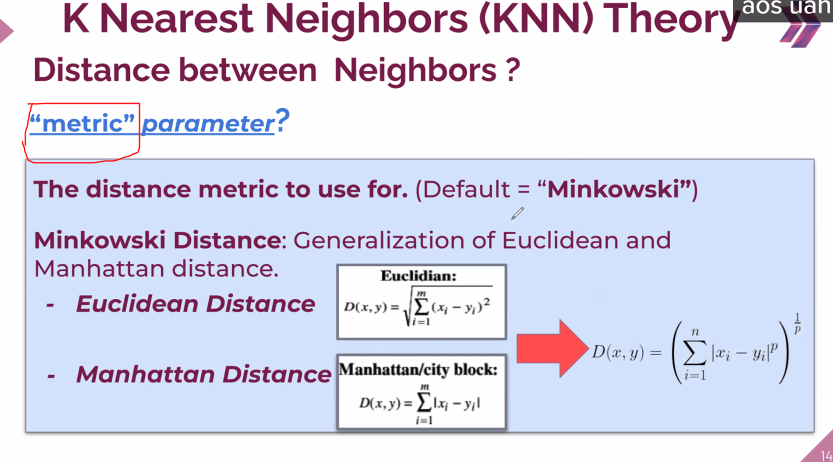

In [11]:
# Manhattan (p=1) outlier lara karşı iyi mücadele eder, mesafeyi daha fazla hesapladığı için
# Euclidian (p=2) da outlier lara karşı o kadar hassas değil, kuş bakışı mesafeye baktığı için

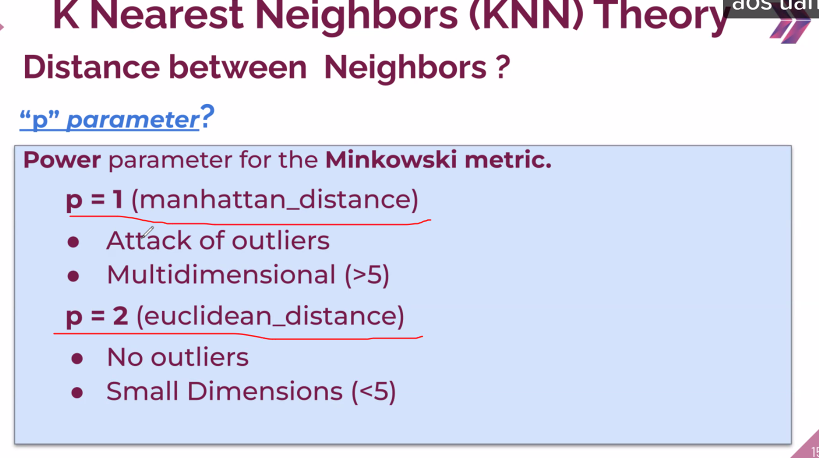

In [12]:
# 1. ders sonları 2. ders başları
# Distance-based model olduğu için scale yapmamız gerekiyor demiştik
# Bunu yapmazsak yanlış tahminlerle karşılaşırız
# Alttaki grafiklere bakalım. X1 ve X2 feature ları var
# Soldaki grafikte X1 feature ımız  -2 ye +2 aralığında gibi görünüyor. Range=4 birim. X1 in değişimi 4 birimlik alanda değişiyor
# .. X2 nin de -15 ile 50 arasında 65 birimlik bir değişim var. Örneğin siyah noktamızı düşünelim
# .. Acaba bu noktayı hangi noktaya atar? k=10 olsun. X1 in range i küçük olduğu için değerleri X1 e göre değerlendirecek X2 den ziyade
# .. ve buna göre bir sınıflandırma yapacak modelimiz. Bu da yanlış sınıflandırma yapmamıza sebep olur
# Sağdaki grafikte scale ettikten sonraki halini görüyoruz. Bu şekilde scale edilmiş halde sınıflandırma yapmamız daha doğru
# özetle disatnce based modellerde scaling çok çok önemli. Target a scaling yapmıyoruz. Featurelara scaling yapıyoruz sadece

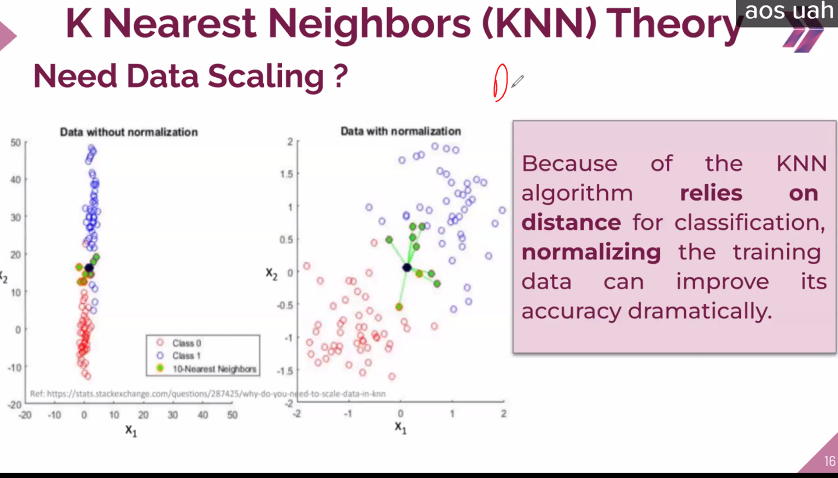

In [13]:
# Avantajları
    # Bir varsayımı yoktu
    # Anlaması ve yorumlaması kolay bir model
    # Eğitime ihtiyaç duyulmuyor. "Map" leme yapıyor
    # Mesafeyi nasıl ağırlıklandırdığımız önemli
    # Regresyon ve Classification problemlerinde kullanılır. Genelde classificaion kullanılıyor.

# Dezavantajları
    # Çok boyutlu veri setlerinde iyi çalışmıyor. Feature sayısının az olduğu datasetlerinde çalışıyor
    # Outlier lara ve dengesiz verisetlerine(çoğunluk olan sınıfa atama ihtimali yüksek) karşı hassas çünkü distance-based model olduğu için
    # k seçiminin dengesi önemli
    # Scale edilmesi gerekli bir model

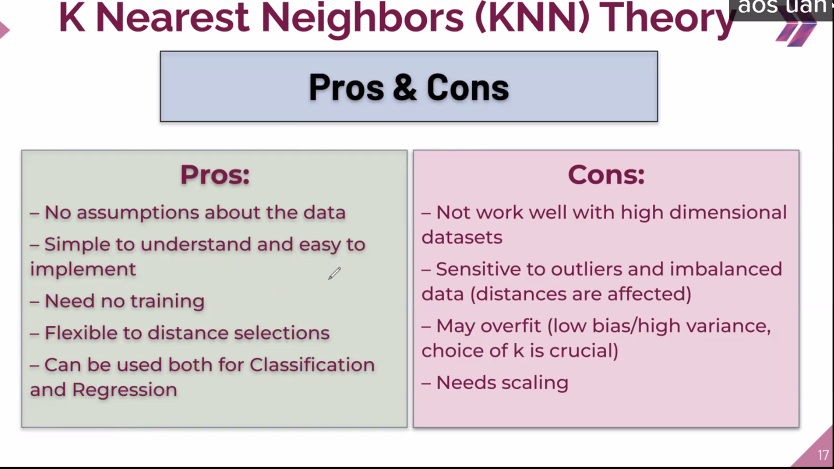

In [14]:
# 1. KNN Memory-based yaklaşımdır.  yeni data eklendikçe sınıflandırıcı hemen adapte olur. (doğru)
# 2. Veri büyüdükçe hesaplama maliyetimiz artar
    # Yeni datanın BÜTÜN datalara olan uzaklığını hesaplayıp sonra k sayısına göre seçim yapıyor.
    # .. Bu yüzden hesaplama maliyeti büyük
# Sonuç olarak, 2 side doğru

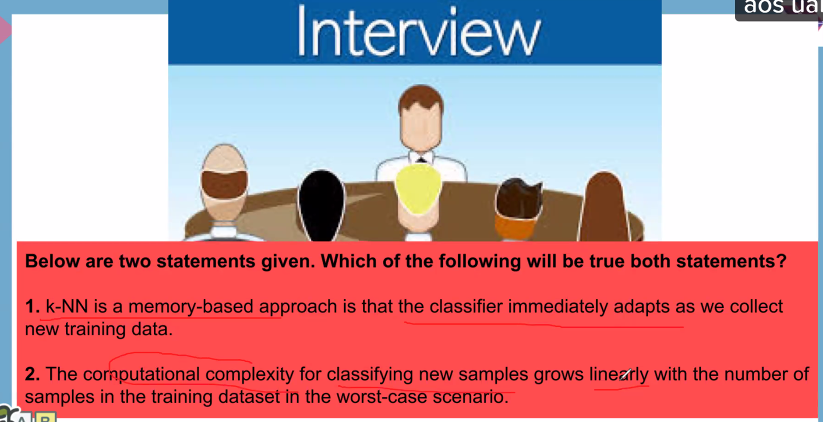

## K-Nearest Neighbors(KNN)

#Ares Hoca: KNN dediğimiz zaman aklımıza gelmesi gerekenler;

#Ideal for small datasets

#Scaling data is important

#Distance based model

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [16]:
df = pd.read_csv('gene_expression.csv')
df.head()
# 1 ler kanser 0 lar kanser değil
# Kanserli olup olmadığını tahmin edeceğiz.

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

## Exploratory Data Analysis and Visualization

In [17]:
df.info() # Missing value yok, dtype lar nümerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [18]:
df.describe() # std > mean gibi bir durum yok. Outlier ımız yok diyebiliriz

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

In [19]:
df["Cancer Present"].value_counts()  # Balanced bir data görüyoruz

1    1500
0    1500
Name: Cancer Present, dtype: int64

[Text(0, 0, '1500'), Text(0, 0, '1500')]

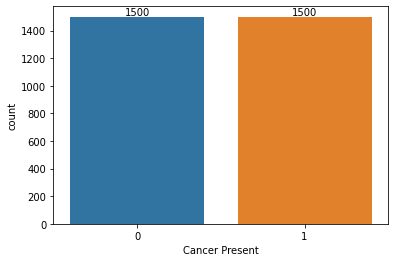

In [20]:
ax= sns.countplot(df["Cancer Present"]);
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

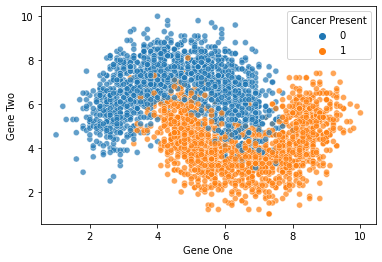

In [21]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)
# Grafikte datanın bazı noktalarda iç içe girdiğini görüyoruz. Orada modelimiz yanlış tahminler yapacaktır
# Bunu bir alt grafikte daha yakın gözlemleyelim

(4.0, 8.0)

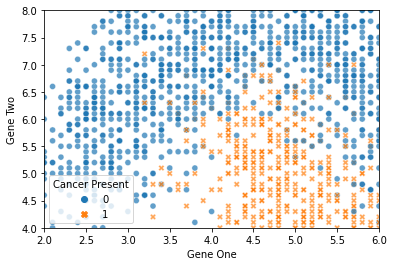

In [22]:
# Üstteki grafikle belli bir noktaya yakınlaştırmış halini inceliyoruz
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

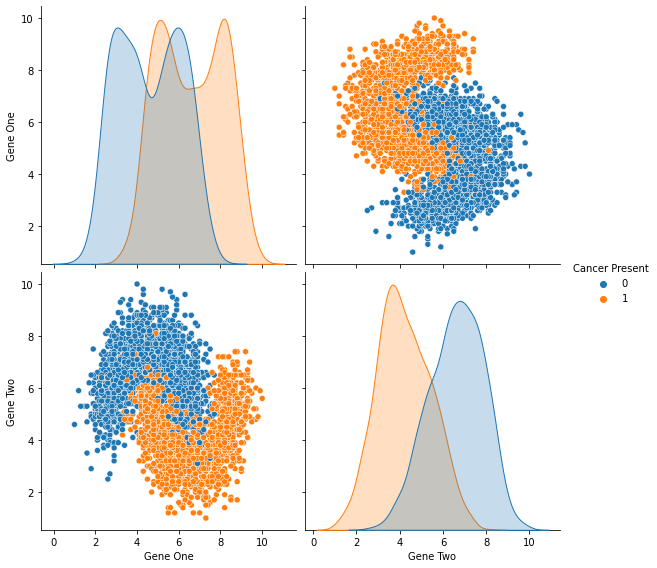

In [23]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect =1)
# Sınıfların iç içe girdiğini görüyoruz(Sol üst ve sağ alttaki grafiklerde kde grafiklerinde)

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene One'>

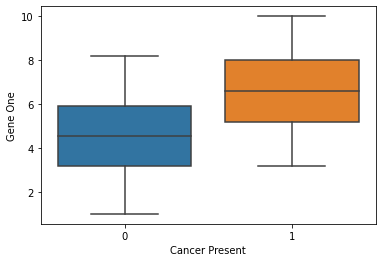

In [24]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df)
# 0 ve 1 class ında outlier görünmüyor
# Ares hoca: Yorum olarak Gene one büyükse kanser olma durumu artıyor diyebiliriz

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene Two'>

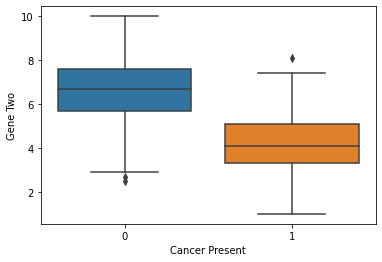

In [25]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df)
# Gene two data noktası daha büyükse kanser olmama durumu daha yüksek diyebiliriz

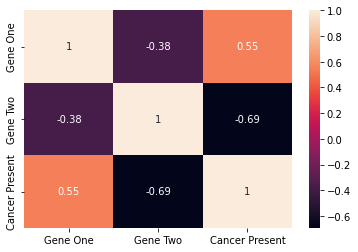

In [26]:
sns.heatmap(df.corr(), annot=True);
# Multicolliniearity görünmüyor
# Gene one ın sayısal değeri arttıkça kanser olma ihtimali artıyor(0.55)
# Gene two için tersi denebilir(-0.69)
# Ufak insightlar çıkardık

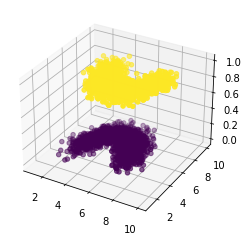

In [27]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);
# 3 feature varsa bu şekilde grafikler çizdirebiliriz
# 3 boyutlu olunca data noktalarının birbirinden nasıl ayrıldığını net olarak görüyoruz

In [28]:
# EDA aşamasından sonra modellemeye geçiyoruz

## Train|Test Split and Scaling Data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)     # x train i fit ve transform yapıyorum. bütün mean ve std öğrenmiş oluyor
X_test_scaled = scaler.transform(X_test)   # dha sonra öğrenmiş oduğu bilgileri x test e tranform ediyorum

## Modelling

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5) # k=5 seçtik. Normalde default değeri 5 zaten.

In [36]:
knn_model.fit(X_train_scaled,y_train)   
# Modelimizde burada train datamızı fit ediyoruz. Eğitim derken ütün data noktalarını map liyor aslında

KNeighborsClassifier()

In [37]:
y_pred = knn_model.predict(X_test_scaled)
y_pred
# Tahminlerimizi aldık

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [38]:
y_pred_proba = knn_model.predict_proba(X_test_scaled) # Acaba ne kadar bir olasılıkla yapmış tahminlerimizi bakıyoruz

In [39]:
pd.DataFrame(y_pred_proba)  # Örneğin 0. indexte 0 class ına 0.0 olasılıkla atamış, 1 class ına 1.0 olasılıkla atamış

0    1
0    0.0  1.0
1    0.0  1.0
2    0.0  1.0
3    1.0  0.0
4    1.0  0.0
..   ...  ...
895  0.4  0.6
896  1.0  0.0
897  0.0  1.0
898  0.0  1.0
899  1.0  0.0

[900 rows x 2 columns]

In [40]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

# 1 sınıfına ait olma ve 0 sınıfına ait olma olasılıkları alıyoruz bu adımda
# İlk satıra bakarsak Gerçek değeri 0 pred i 0 olarak tahmin etmiş 0.8 olasılıkla vs... 

# Class chat soru : Hocam probayı weighted distance  a göre mi belirliyor? --> Ares Hoca: Evet

In [41]:
pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
965        0     0      0.0      1.0
838        1     1      1.0      0.0
929        1     1      1.0      0.0
254        1     1      1.0      0.0
479        0     0      0.0      1.0
1614       0     0      0.2      0.8
798        1     1      1.0      0.0
834        0     0      0.0      1.0
251        0     0      0.0      1.0
111        0     0      0.0      1.0

## Model Performance on Classification Tasks

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [43]:
confusion_matrix(y_test, y_pred)   # modelin performansını görmek için cm çizdiriyoruz

array([[439,  31],
       [ 34, 396]], dtype=int64)

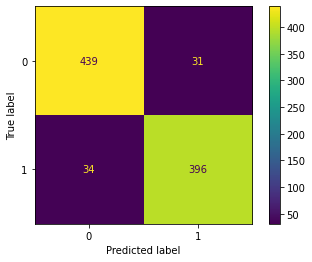

In [44]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

# 439 ve 396 ımız bizim TRUE değerlerimizdi. 31 ve 34 False değerlerdi
# Modelimiz 31+34 = 65 tane gözlemi yanlış tahmin etmiş

In [45]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Balanced data seti olduğu için accuracy ye bakabiliriz.0.93
# Recall ve precision a bakmamıza gerek yok burada çünkü balanced bir data seti

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [46]:
y_train_pred = knn_model.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# burada train datası üzerinden değerleri aldık
# Accuracy burada yüzde 94. Skorlar birbirine yakın. Overfit durumu görünmüyor

[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## Elbow Method for Choosing Reasonable K Values

In [47]:
# Optimal k yı belirleyelim Elbow method ile

In [48]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [49]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)     # k yı 1 den 30 a kadar değişecek
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)      # farklı k lara göre tahminler alacak
      
    test_error = 1 - accuracy_score(y_test,y_pred_test) # balanced data olduğundan error olarak accuracy üzerinden hesaplama yapıyoruz
    
    test_error_rates.append(test_error)                 # Bu hataları yukardaki listemize ekliyoruz
    
# Class chat soru: Burada 30 değerine nasıl karar veriyoruz? --> Orion hoca: Deneme
# k yı arttırdığımızda model underfit e doğru gidecektir(Örneğin 30 yerine 300 yazarsak deneyebiliriz(Altta denendiğinde çıktıyı görebiliriz))

##### k=300 iken hatanın arttığını görüyoruz
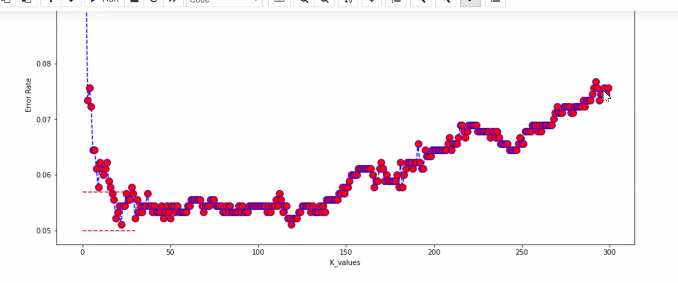

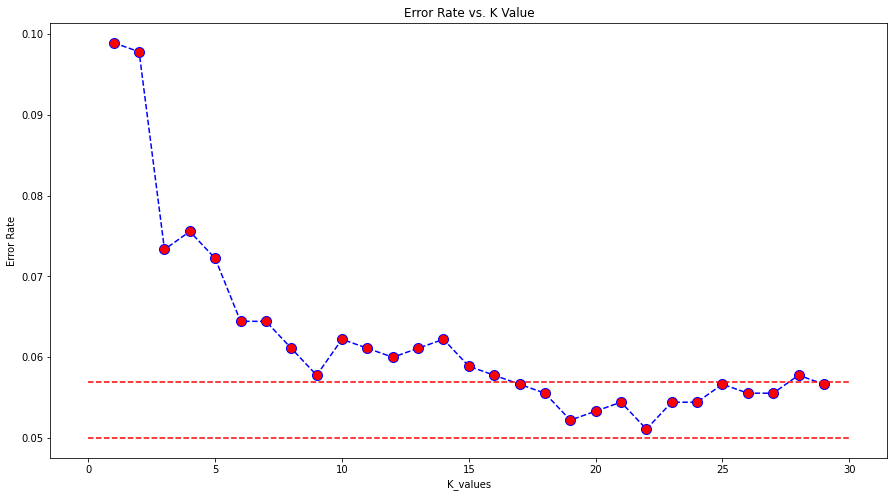

In [50]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.050, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# Optimal k yı 9 seçebiliriz. Daha büyük değerlerde daha düşük değerler var (22 de mesela)
# .. Ancak hatalar arasındaki çok küçük bir değişim için 22 yi seçmek mantıklı olmayacaktır.
# hesaplama maliyeti açısından 9 seçmek mantıklı

# Class chat soru: hocam bu train errorları mı sadece? --> Orion Hoca: Test
    # Thread devamı: test ile traini karşılaştırarak yapacak herhalde devamında? --> Orion Hoca: Evet

## Overfiting and underfiting control for k values

In [51]:
# 3. ders başı
# Train hatalarına da bakalım . Kodlar benzer

In [52]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

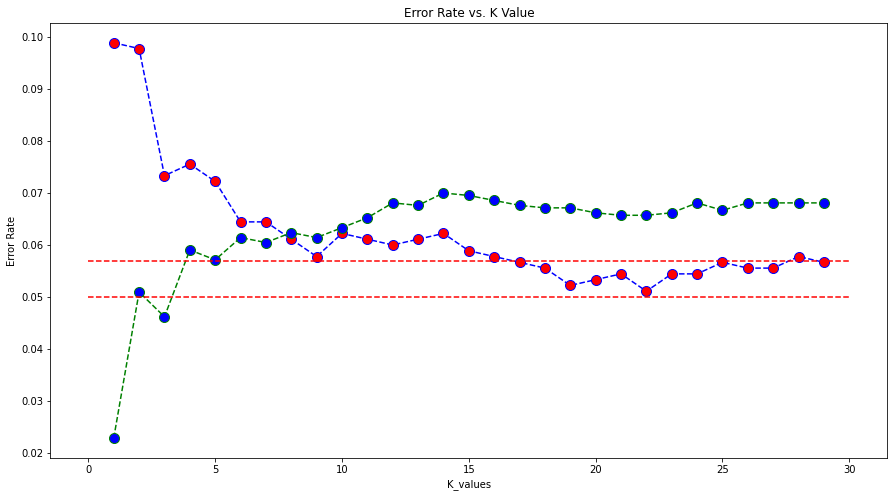

In [53]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.050, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
# Mavi noktalar train hataları
# Kırmızı noktalar test hataları
# Bunları birbirine yaklaştığı nokta 9 noktası gibi görünüyor. Burada da farklı bir bakış açısıyla insight elde ettik

## Scores by Various K Values

In [54]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)       # Şimdi 1 komşuluğunda deneyelim train ve test skorlarıma bakalım

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

# Train de accuracy 0.98  gelmiş , test te 0.90 olmuş accuracy . yani overfit olmuş k küçük iken

WITH K=1

Test_Set

[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set

[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [56]:
knn = KNeighborsClassifier(n_neighbors=22)  # k = 22 de hatam düşüktü ama bakalım test ve train e

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

# train de accuracy:0.93, test te 0.95. Değerler yakın. Tercih edilebilir ama bir de 9 değerine bakalım

WITH K=22

Test_Set

[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [57]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

# Train 0.94 e test 0.94 çıktı. Değerler birbirine çok yakın çıktı ve bunu k=9 yani düşük bir k değeriyle elde ettik
# 28+24= 52 tane hatalı tahmin yapmışız

WITH K=9

Test_Set

[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [58]:
knn = KNeighborsClassifier(n_neighbors=15)  # Bunu da deneyelim

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)
# Bu da tercih edilebilir. Train test skorları yakın

# Sonuç olarak k: 1,9,15,22 değerlerini denedik. 
# Elbow a göre en mantıklısı 9 olarak görünüyor
# Hesaplama maliyeti için 9 dan 22 ye çıkmaya gerek yok. Ancak 22 de makinanız güçlüyse tercih edilebilir
# 29+24 = 53 tane hata yapmış

WITH K=15

Test_Set

[[446  24]
 [ 29 401]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[957  73]
 [ 73 997]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [ ]:
# elbow metoduna göre optimal çözüm 9 oluyor. 22 yi hesaplama maliyetinden dolayı tercih etmiyorum

## Cross Validate For Optimal K Value

In [59]:
from sklearn.model_selection import cross_val_score, cross_validate

In [60]:
model = KNeighborsClassifier(n_neighbors=9)   # optimal k ile cross validation yapalım

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.004000    0.027998       0.923810        0.933333     0.915888  0.924528
2   0.003004    0.034002       0.947619        0.944444     0.953271  0.948837
3   0.002997    0.020004       0.947619        0.970588     0.925234  0.947368
4   0.001999    0.032999       0.866667        0.876190     0.859813  0.867925
5   0.001997    0.018999       0.923810        0.909910     0.943925  0.926606
6   0.003000    0.026000       0.919048        0.924528     0.915888  0.920188
7   0.002005    0.017995       0.942857        0.927928     0.962617  0.944954
8   0.002999    0.018006       0.938095        0.927273     0.953271  0.940092
9   0.001995    0.016999       0.961905        0.980583     0.943925  0.961905
10  0.002006    0.017994       0.890476        0.868421     0.925234  0.895928

In [61]:
df_scores.mean()[2:]
# Burada test skorumuz 0.926190 çıkmış. k=9 iken test skorum 0.94 dü accuracy değeri. 
# Skorlar tutarlı görünüyor. Overfitting durumu da yok

test_accuracy     0.926190
test_precision    0.926320
test_recall       0.929907
test_f1           0.927833
dtype: float64

## Predict New Observation

In [62]:
# Model scaling yapıldığında ve yapılmadığındaki sonuçların farklılığını görelim !

In [63]:
new_observation = [[3.5, 4.3]]

In [64]:
knn_model.predict(new_observation) # Scale yapılmadan aldığım tahmin de kanser(1 sınıfına ait) dedi modelimiz

array([1], dtype=int64)

In [65]:
knn_model.predict_proba(new_observation)
# Bu tahmini 0.65 olasılıkla yaptı

array([[0.34482759, 0.65517241]])

In [66]:
new_observation_scaled = scaler.transform(new_observation) # Scale edelim
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [67]:
knn_model.predict(new_observation_scaled)  # Scale yapıldıktan sonra aldığım tahmin de kanser değil(0 sınıfına ait) dedi modelimiz

array([0], dtype=int64)

In [68]:
knn_model.predict_proba(new_observation_scaled) # Bu tahmini 0.62 olasılıkla yaptı

array([[0.62068966, 0.37931034]])

## Gridsearch Method for Choosing Reasonable K Values

In [69]:
# Elbow a baktık. Şimdi diğer method olan gridsearch e bakalım

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
knn_grid = KNeighborsClassifier()

In [72]:
k_values= range(1,30)

In [73]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
# En iyi parametreleri bulmak için paramatrelerimizde deneyeceği değerleri tanımlayalım

In [74]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [75]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [76]:
knn_grid_model.best_params_  # k=21 , p:2(eucledian) , weight: uniform(noktalara eşit ağırlıklar versin)
# Burada grid search ün verdiği değer genelde tercih edilmez
# grid search her zaman için hatanın minimum olduğu noktayı seçiyor

{'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}

In [77]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

# n_neighbors=9,      test_accuracy: 94  with 52 error
# n_neighbors=21,    test_accuracy: 95   with 49 error

# Tercih noktasında sizden ne istenildiğine göre karar verilebilir
# Ancak hesaplama maliyetine göre 9 u tercih etmek daha mantıklı görünüyor

WITH K=21

Test_Set

[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluating ROC Curves and AUC

In [78]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train) # k=9 a göre ...

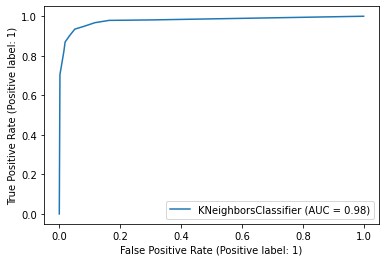

In [80]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [81]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

# False positive rate lerin minimum olmasını istiyoruz
# True positive rate i de maximize etmek istiyoruz
# AUC: Yaklaşık 0.98 .. Kanser olma ve olmama durumunu yüzde 98 olarak başarılı yapıyor diyebiliriz

0.9781296387926769

## Final Model and Model Deployment

In [82]:
import pickle

In [83]:
scaler = StandardScaler()

In [84]:
scaler.fit(X)  # Tüm datayı fit ediyoruz. Dikkat fit_transform yapmıyoruz.

StandardScaler()

In [85]:
X_scaled = scaler.transform(X)    # fit ve transform işlemlerini ayrı ayrı yapıyorum

In [86]:
final_knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_scaled,y)

In [87]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb')) 

# wb: write binary(Daha az yer kaplaması için) 
# Modelimizi ileride çağırmak üzere, localimize kaydettik, kaldırdık

In [88]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))   # Yukarıda tanımladığımız scaler ı da kaydediyoruz

## Predict New Observations

In [89]:
# Şimdi kullanmak istediğimizi düşenerek tekrar çağıralım kaydettiklerimizi

In [90]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb')) 

In [91]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [92]:
X.columns

Index(['Gene One', 'Gene Two'], dtype='object')

In [93]:
X.describe()

Gene One     Gene Two
count  3000.000000  3000.000000
mean      5.600133     5.410467
std       1.828388     1.729081
min       1.000000     1.000000
25%       4.300000     4.000000
50%       5.600000     5.400000
75%       6.900000     6.700000
max      10.000000    10.000000

In [94]:
# Yapay gözlem oluşturalım
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6], 
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [95]:
samples = pd.DataFrame(new_obs)
samples

Gene One  Gene Two
0       1.0       1.0
1       3.0       4.0
2       4.3       4.0
3       5.6       5.5
4       7.0       6.7
5       9.5      10.0
6       2.0       8.0
7       6.0       1.0

In [96]:
samples_scaled = loaded_scaler.transform(samples) # Buradaki datamı dönüştürüyoruz. Localimize kaydettiğimiz scaler ile yapıyoruz bunu
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [97]:
predictions = loaded_model.predict(samples_scaled) # k = 9 iken scale edilmiş tahminlerimizi alıyoruz
predictions_proba = loaded_model.predict_proba(samples_scaled) # Burada da olasılıklarımızı

In [98]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]  # 1 sınıfına ait olasılıklar
samples["pred_proba_0"] = predictions_proba[:,0]  # 0 sınıfına ait olasılıklar
samples

Gene One  Gene Two  pred  pred_proba_1  pred_proba_0
0       1.0       1.0     0      0.000000      1.000000
1       3.0       4.0     0      0.111111      0.888889
2       4.3       4.0     1      1.000000      0.000000
3       5.6       5.5     0      0.222222      0.777778
4       7.0       6.7     0      0.000000      1.000000
5       9.5      10.0     1      0.666667      0.333333
6       2.0       8.0     0      0.000000      1.000000
7       6.0       1.0     1      1.000000      0.000000

## Pipeline

What happens can be described as follows:

Step 1: The data are split into TRAINING data and TEST data according to ratio of train_test_split

Step 2: the scaler is fitted on the TRAINING data

Step 3: the scaler transforms TRAINING data

Step 4: the models are fitted/trained using the transformed TRAINING data

Step 5: the scaler is used to transform the TEST data

Step 6: the trained models predict using the transformed TEST data

pipe.fit(X_train, y_train)--> scaler.fit_transform(X_train) --> knn.fit(scaled_X_train, y_train)

pipe.predict(X_test)      --> scaler.transform(X_test)      --> knn.predict(scaled_X_test)

In [99]:
# Ares Hoca: Bundan sonraki notebook artık pipeline kurarak modelleme yapacağız.

In [100]:
from sklearn.pipeline import Pipeline

In [101]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())] 

# Bunların sırası önemli. Önce scaling sonra modelleme yapacak
# Data leakage olmaması için traine fit_transform yapıp, test e sadece transform yapacak. O adımı halledecek
# Not olarak KNN burada default değerle yani 5 değeriyle devam ediyoruz burada pipeline ı göstermek adına

In [102]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [103]:
pipe_model = Pipeline(steps=operations)

In [104]:
pipe_model.fit(X_train, y_train)  # Eğitimi yaptık # scaler.fit_transform(X_train) --> knn.fit(scaled_X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [105]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [106]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

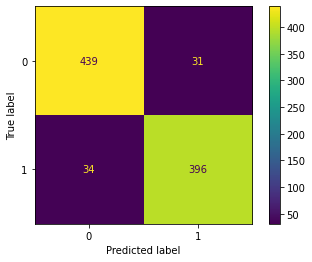

In [107]:
plot_confusion_matrix(pipe_model, X_test, y_test);

In [108]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
# 65 errors

Test_Set

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set

[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## Changing the parameters of the pipe_model

In [109]:
pipe_model.get_params() # Burada nasıl yazıldı ise pipe_model.set_params kısmında o şekilde yazmalıyız

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [110]:
pipe_model.set_params(knn__n_neighbors= 9) # Parametreyi değiştiriyoruz burada. 5 i 9 ile değiştirdik

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [111]:
pipe_model.get_params() # Parametrenin değiştiğini görüyoruz (knn__n_neighbors': 9 kısmında)

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [112]:
pipe_model['scaler'] # Scaler ımızı "scaler" ismi ile  tanımlamıştık

StandardScaler()

In [113]:
pipe_model["knn"]  # Modeli "knn" ismi ile  tanımlamıştık

KNeighborsClassifier(n_neighbors=9)

## GridSearch on Pipeline

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {'knn__n_neighbors': range(1,30)} # Yazıma burada da dikkat etmeliyiz('knn__n_neighbors' şeklinde yazdık)
pipe_model = Pipeline(steps=operations)

In [116]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')  
# dengeli bir dataseti olduğu için accuracy de f1 e de bakabilirizz, farketmez

In [117]:
pipe_grid.fit(X_train,y_train) # Eğitim

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [118]:
pipe_grid.best_params_

{'knn__n_neighbors': 21}

## CrossValidate on Pipeline

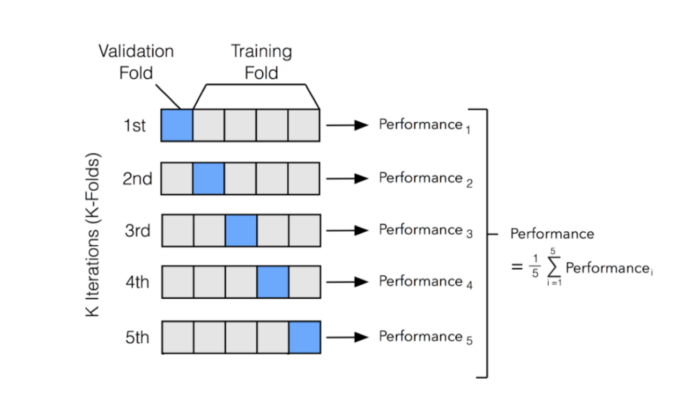

In [119]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(operations)  # CV öncesi modeli sıfırlamamız lazım scaler ımızı tanımladık, n_neigbors=9 u tanımladık tekrar 


scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# k=9 iken sonuçları görmüştük yukarda. Bunu pipeline ile de görmüş olduk

# Class chat soru: pipelineda parametrelerle oynamadan yukarıda değşkene atadığımız en iyi modeli kullanamaz mıyız?
# Orion: Tekrar aynı parametreleri yazıp eğitmeniz lazım ([('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))])

test_precision    0.925515
test_recall       0.930841
test_f1           0.927874
test_accuracy     0.926190
dtype: float64

## Final pipe_model 

In [120]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]

In [121]:
pipe_final = Pipeline(operations)

In [122]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

## Predict New Observations with pipe_model

In [123]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }
samples = pd.DataFrame(new_obs)
samples

Gene One  Gene Two
0       1.0       1.0
1       3.0       4.0
2       4.3       4.0
3       5.6       5.5
4       7.0       6.7
5       9.5      10.0
6       2.0       8.0
7       6.0       1.0

In [124]:
predictions = pipe_final.predict(samples)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [125]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [126]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

Gene One  Gene Two  pred  pred_proba
0       1.0       1.0     0    0.000000
1       3.0       4.0     0    0.111111
2       4.3       4.0     1    1.000000
3       5.6       5.5     0    0.222222
4       7.0       6.7     0    0.000000
5       9.5      10.0     1    0.666667
6       2.0       8.0     0    0.000000
7       6.0       1.0     1    1.000000